## **BUSINESS SCENARIO**


A retail chain operating across multiple cities in India wants to improve its decision-making by analysing customer purchase behaviour. The company has recently expanded into Tier-2 and Tier-3 cities and is experiencing challenges in understanding customer preferences, seasonal demand, and city-level sales performance. The raw transactional data from their stores is messy, incomplete, and inconsistent, making it difficult for business analysts to directly use it for insights.
The company’s AI team has approached you (the participants) to preprocess the data, clean it, and visualize key patterns that can help management make better marketing and inventory decisions.


In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter
import warnings

warnings.filterwarnings('ignore')
data = pd.read_csv("/content/Retail_Transactions_2000.csv")

In [423]:
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [424]:
print(f"This data set contain {data.shape[0]} rows and {data.shape[1]} columns")

This data set contain 2000 rows and 11 columns


In [425]:
print("The data set conatin these columns:")
print(50 *"--")
print(f"{data.columns}")

The data set conatin these columns:
----------------------------------------------------------------------------------------------------
Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')


In [426]:
print("Basic info about data: ")
print(50*"--")
data.info()

Basic info about data: 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


# **PART A: DATA PREPROCESSING**

**1. Identifying Missing Values**

In [427]:
data.isnull().sum()[data.isnull().sum() > 0]

,0


In [428]:
print("No missing value was found in the data set")

No missing value was found in the data set


**2. Data Cleaning**

In [429]:
data[data.duplicated()]

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount


In [430]:
print("No duplicate rows was found in the data set")

No duplicate rows was found in the data set


In [431]:
data["Gender"].replace(["m", "MALE", "Male"], "Male", inplace=True)

In [432]:
data["Gender"].replace(["f", "FEMALE", "Female"], "Female", inplace=True)

In [433]:
data[(data["Price"] <= 0) | (data["Quantity"] <= 0)]

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount


In [434]:
print("There was no negative or positive vlaue in Price and Quantity column")

There was no negative or positive vlaue in Price and Quantity column


**3. Feature Engineering**

In [435]:
print(f"The total amount of all sales is ₹{data["TotalAmount"].sum():,}")

The total amount of all sales is ₹14,614,829


In [436]:
data["PurchaseDate"] = pd.to_datetime(data["PurchaseDate"])
data["Month"] = data["PurchaseDate"].dt.month_name()
data["DayOfWeek"] = data["PurchaseDate"].dt.day_of_week
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,2
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,6
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,1
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,2
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,5


In [437]:
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
data["Age_Group"] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,Age_Group
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,2,30-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,6,20-30
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,1,40-50
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,2,20-30
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,5,40-50


**4. Encoding & Transformation**

In [438]:
data["Gender"].replace("Male", "1", inplace=True)
data["Gender"].replace("Female", "0", inplace=True)
data["Gender"].replace("Other", "-1", inplace=True)
data["Gender"] = data["Gender"].astype(int)

In [439]:
df = data.copy()
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,Age_Group
0,T00001,C2824,0,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,March,2,30-40
1,T00002,C1409,-1,20,Pune,Books,5,1051,2023-01-22,Card,5255,January,6,20-30
2,T00003,C5506,-1,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,April,1,40-50
3,T00004,C5012,-1,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,August,2,20-30
4,T00005,C4657,0,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,September,5,40-50


In [440]:
distinct_cities = data["City"].unique()
distinct_cities

array(['Bengaluru', 'Pune', 'Hyderabad', 'Chennai', 'Delhi', 'Jaipur',
       'Lucknow', 'Ahmedabad', 'Kolkata', 'Mumbai'], dtype=object)

In [441]:
data["City"].replace(distinct_cities, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)

In [442]:
scaler = MinMaxScaler()
data[["Age", "Price", "TotalAmount"]] = scaler.fit_transform(data[["Age", "Price", "TotalAmount"]])
data.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,Age_Group
0,T00001,C2824,0,0.288462,0,Fashion,3,0.893673,2023-03-15,Cash,0.536495,March,2,30-40
1,T00002,C1409,-1,0.038462,1,Books,5,0.194082,2023-01-22,Card,0.207094,January,6,20-30
2,T00003,C5506,-1,0.557692,1,Furniture,1,0.002245,2023-04-18,Wallet,0.000000,April,1,40-50
3,T00004,C5012,-1,0.057692,2,Groceries,5,0.580816,2023-08-09,Cash,0.588550,August,2,20-30
4,T00005,C4657,0,0.442308,3,Sports,1,0.616939,2023-09-23,Wallet,0.121261,September,5,40-50


**5. Final verification**

In [443]:
data.isnull().sum()[data.isnull().sum() > 0]

,0


In [444]:
print(f"No column with missing values wa found")

No column with missing values wa found


In [445]:
data.to_csv("Retail_Cleaned.csv", index=False)

# **PART B: DATA VISUALIZATION**

**1. Customer Demographics**

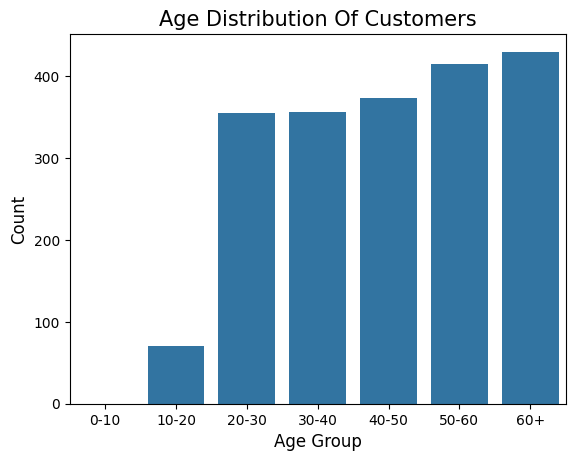

In [446]:
age_group = data["Age_Group"].to_frame()
sns.countplot(x="Age_Group", data=age_group)
plt.title("Age Distribution Of Customers", fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

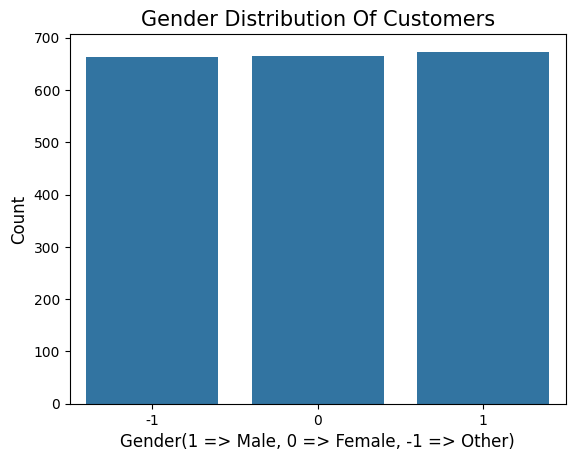

In [447]:
gender = data["Gender"].to_frame()
sns.countplot(x="Gender", data=gender)
plt.title("Gender Distribution Of Customers", fontsize=15)
plt.xlabel("Gender(1 => Male, 0 => Female, -1 => Other)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [448]:
data.groupby(by="Gender")["Gender"].count()

,Gender
Gender,
-1,663
0,664
1,673


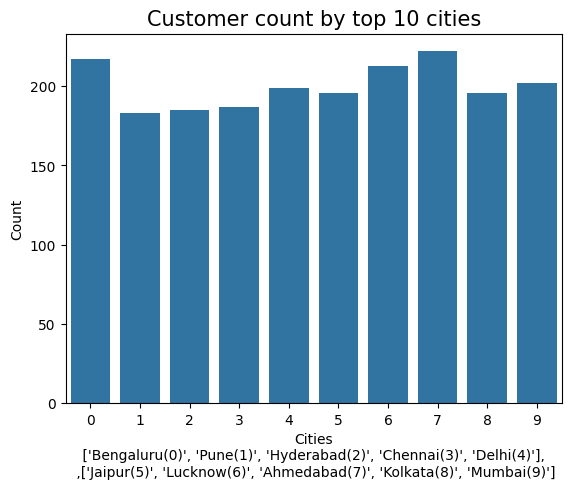

,count
City,
0,217
1,183
2,185
3,187
4,199
5,196
6,213
7,222
8,196


In [470]:
cities = data["City"].to_frame()
sns.countplot(x="City", data=cities)
plt.title("Customer count by top 10 cities", fontsize=15)
plt.xlabel(f"Cities\n {['Bengaluru(0)', 'Pune(1)', 'Hyderabad(2)', 'Chennai(3)', 'Delhi(4)']}, \n ,{['Jaipur(5)','Lucknow(6)', 'Ahmedabad(7)', 'Kolkata(8)', 'Mumbai(9)']}", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()
cities.value_counts().sort_index()

**2. Sales Insights**

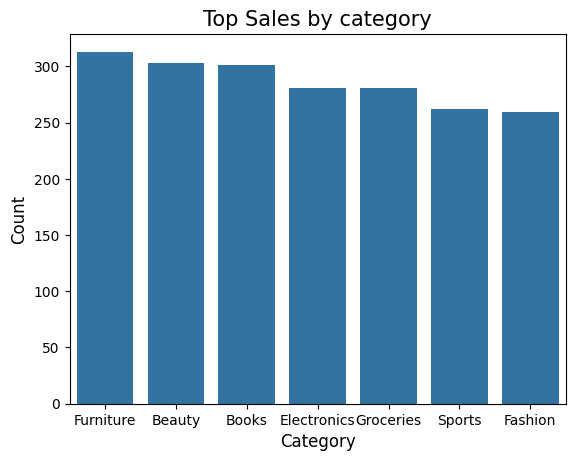

,count
ProductCategory,
Furniture,313
Beauty,303
Books,301
Electronics,281
Groceries,281
Sports,262
Fashion,259


In [450]:
product_category = data["ProductCategory"].value_counts().to_frame()
sns.barplot(x="ProductCategory", y="count",data=product_category)
plt.title("Top Sales by category", fontsize=15)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()
product_category

In [451]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
sales_trend_monthly =  df.groupby("Month")["TotalAmount"].sum().to_frame().reset_index()
sales_trend_monthly['Month'] = pd.Categorical(sales_trend_monthly['Month'], categories=months_order, ordered=True)
sales_trend_monthly = sales_trend_monthly.sort_values('Month')
sales_trend_monthly

,Month,TotalAmount
4,January,1176647
3,February,995332
7,March,1253582
0,April,1292354
8,May,1294674
6,June,1400202
5,July,1267466
1,August,1338247
11,September,1200150
10,October,1156591


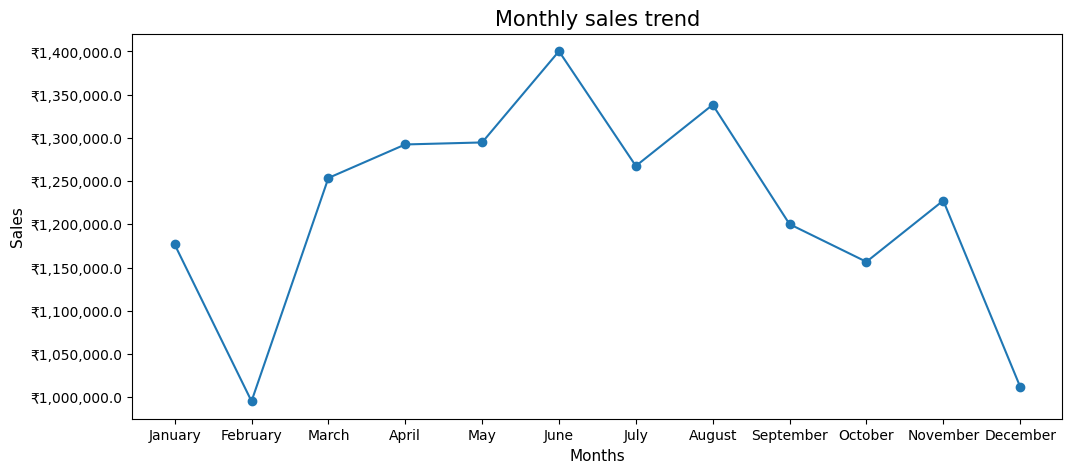

In [452]:
plt.figure(figsize=(12, 5))
ax = plt.gca()
ax.plot(sales_trend_monthly["Month"], sales_trend_monthly["TotalAmount"], marker="o")
ax.set_title("Monthly sales trend", fontsize=15)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"₹{x:,}".format(x)))
ax.set_xlabel("Months", fontsize=11)
ax.set_ylabel("Sales", fontsize=11)
plt.show()

In [453]:
payment_mode_utilization = data.groupby("PaymentMode")["PaymentMode"].count()/data.shape[0]
payment_mode_utilization

,PaymentMode
PaymentMode,
Card,0.2600
Cash,0.2385
UPI,0.2420
Wallet,0.2595


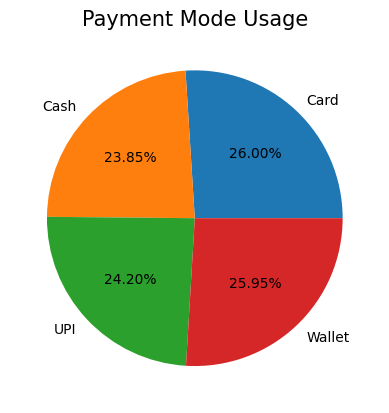

In [454]:
ax = plt.gca()
ax.pie(payment_mode_utilization, labels=payment_mode_utilization.index, autopct="%1.2f%%")
ax.set_title("Payment Mode Usage", fontsize=15)
plt.show()

**3. Advanced Insights**

In [456]:
avg_spend_age_group = df.groupby(by="Age_Group")["TotalAmount"].mean().to_frame()
avg_spend_age_group

,TotalAmount
Age_Group,
0-10,NaN
10-20,8528.028169
20-30,7365.090141
30-40,7159.404494
40-50,7528.782842
50-60,7136.465060
60+,7153.755814


Text(0.5, 1.0, 'Average Spend per customer by Age Group')

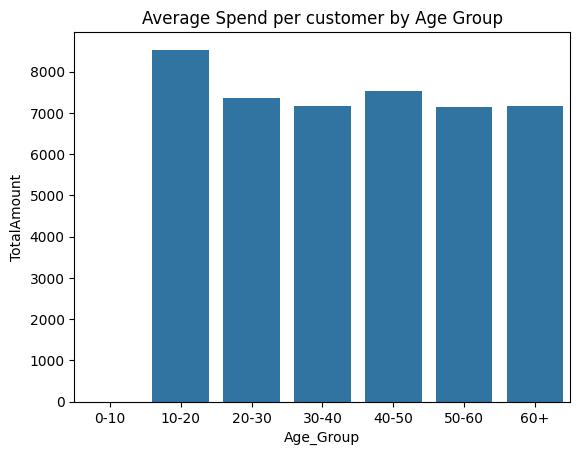

In [458]:
sns.barplot(data=avg_spend_age_group)
plt.title("Average Spend per customer by Age Group")

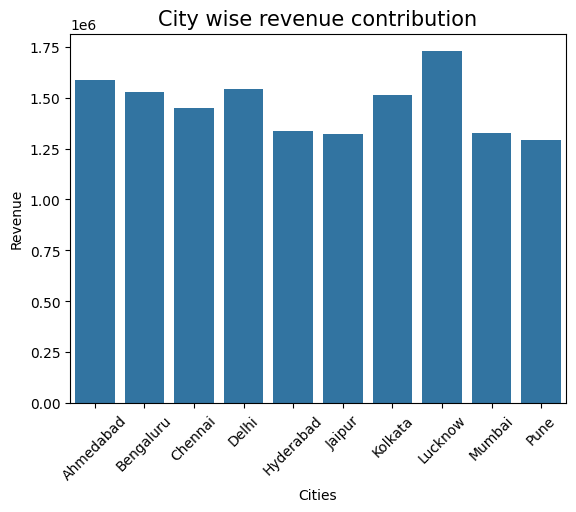

In [469]:
cities = df.groupby(by="City")["TotalAmount"].sum().to_frame()
sns.barplot(x=cities.index, y=cities["TotalAmount"], data=cities)
plt.title("City wise revenue contribution", fontsize=15)
plt.xlabel("Cities", fontsize=10)
plt.ylabel("Revenue", fontsize=10)
plt.xticks(rotation=45)
plt.show()

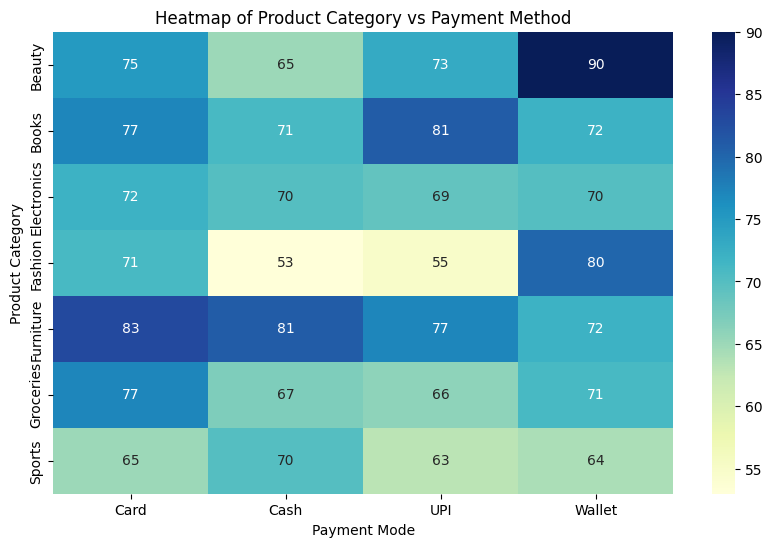

In [474]:
data_pivot = pd.crosstab(df['ProductCategory'], df['PaymentMode'])

plt.figure(figsize=(10, 6))
sns.heatmap(data_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Product Category vs Payment Method')
plt.xlabel('Payment Mode')
plt.ylabel('Product Category')
plt.show()